# Build a Python Application to Rank and Classify Smartphone Features.

In [1]:
#importing necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading train dataset
train_df=pd.read_csv(r'C:\Users\vysha\Downloads\MobileDataSets\MobileDataSets\MobileTrain.csv')
train_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
train_df.tail(3) # to check whether dataset is loaded properly

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[3 rows x 21 columns]

In [5]:
#loading the test dataset
test_df=pd.read_csv(r'C:\Users\vysha\Downloads\MobileDataSets\MobileDataSets\MobileTest.csv')
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [6]:
#checking the size of the dataset
print("The size of train dataset: " , train_df.shape)
print("The size of test dataset: " , test_df.shape)

The size of train dataset:  (2000, 21)
The size of test dataset:  (1000, 21)


In [7]:
print("The columns of train dataset are : " ,train_df.columns)

print("\n The columns of test dataset are : " ,test_df.columns)

The columns of train dataset are :  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

 The columns of test dataset are :  Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [8]:
train_df.dtypes #checking data types

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

No categorical columns present, so encoding is not needed

In [9]:
train_df.info() #checking basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
train_df.describe() #The basic description of the dataset 

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

It gives us information about the count, mean , standard deviation, minimum and maximum values and the three quartile values of all the columns present in the dataset.Here Standard Deviation for 'ram','px_height','px_width','battery_power' are having high value compared to rest of the features.So its good to apply scaling to the dataset.

In [11]:
#checking for null valuues

print("The null values contained in the train dataset is : \n")
print(train_df.isnull().sum())
print("\n The null values contained in the test dataset is : \n")
print(test_df.isnull().sum())

The null values contained in the train dataset is : 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 The null values contained in the test dataset is : 

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


there is no null values present in both dataset.

In [12]:
train_df.duplicated().sum() #checking for duplicates

0

In [13]:
train_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Exploratory Data Analysis

1.Univariant Analysis

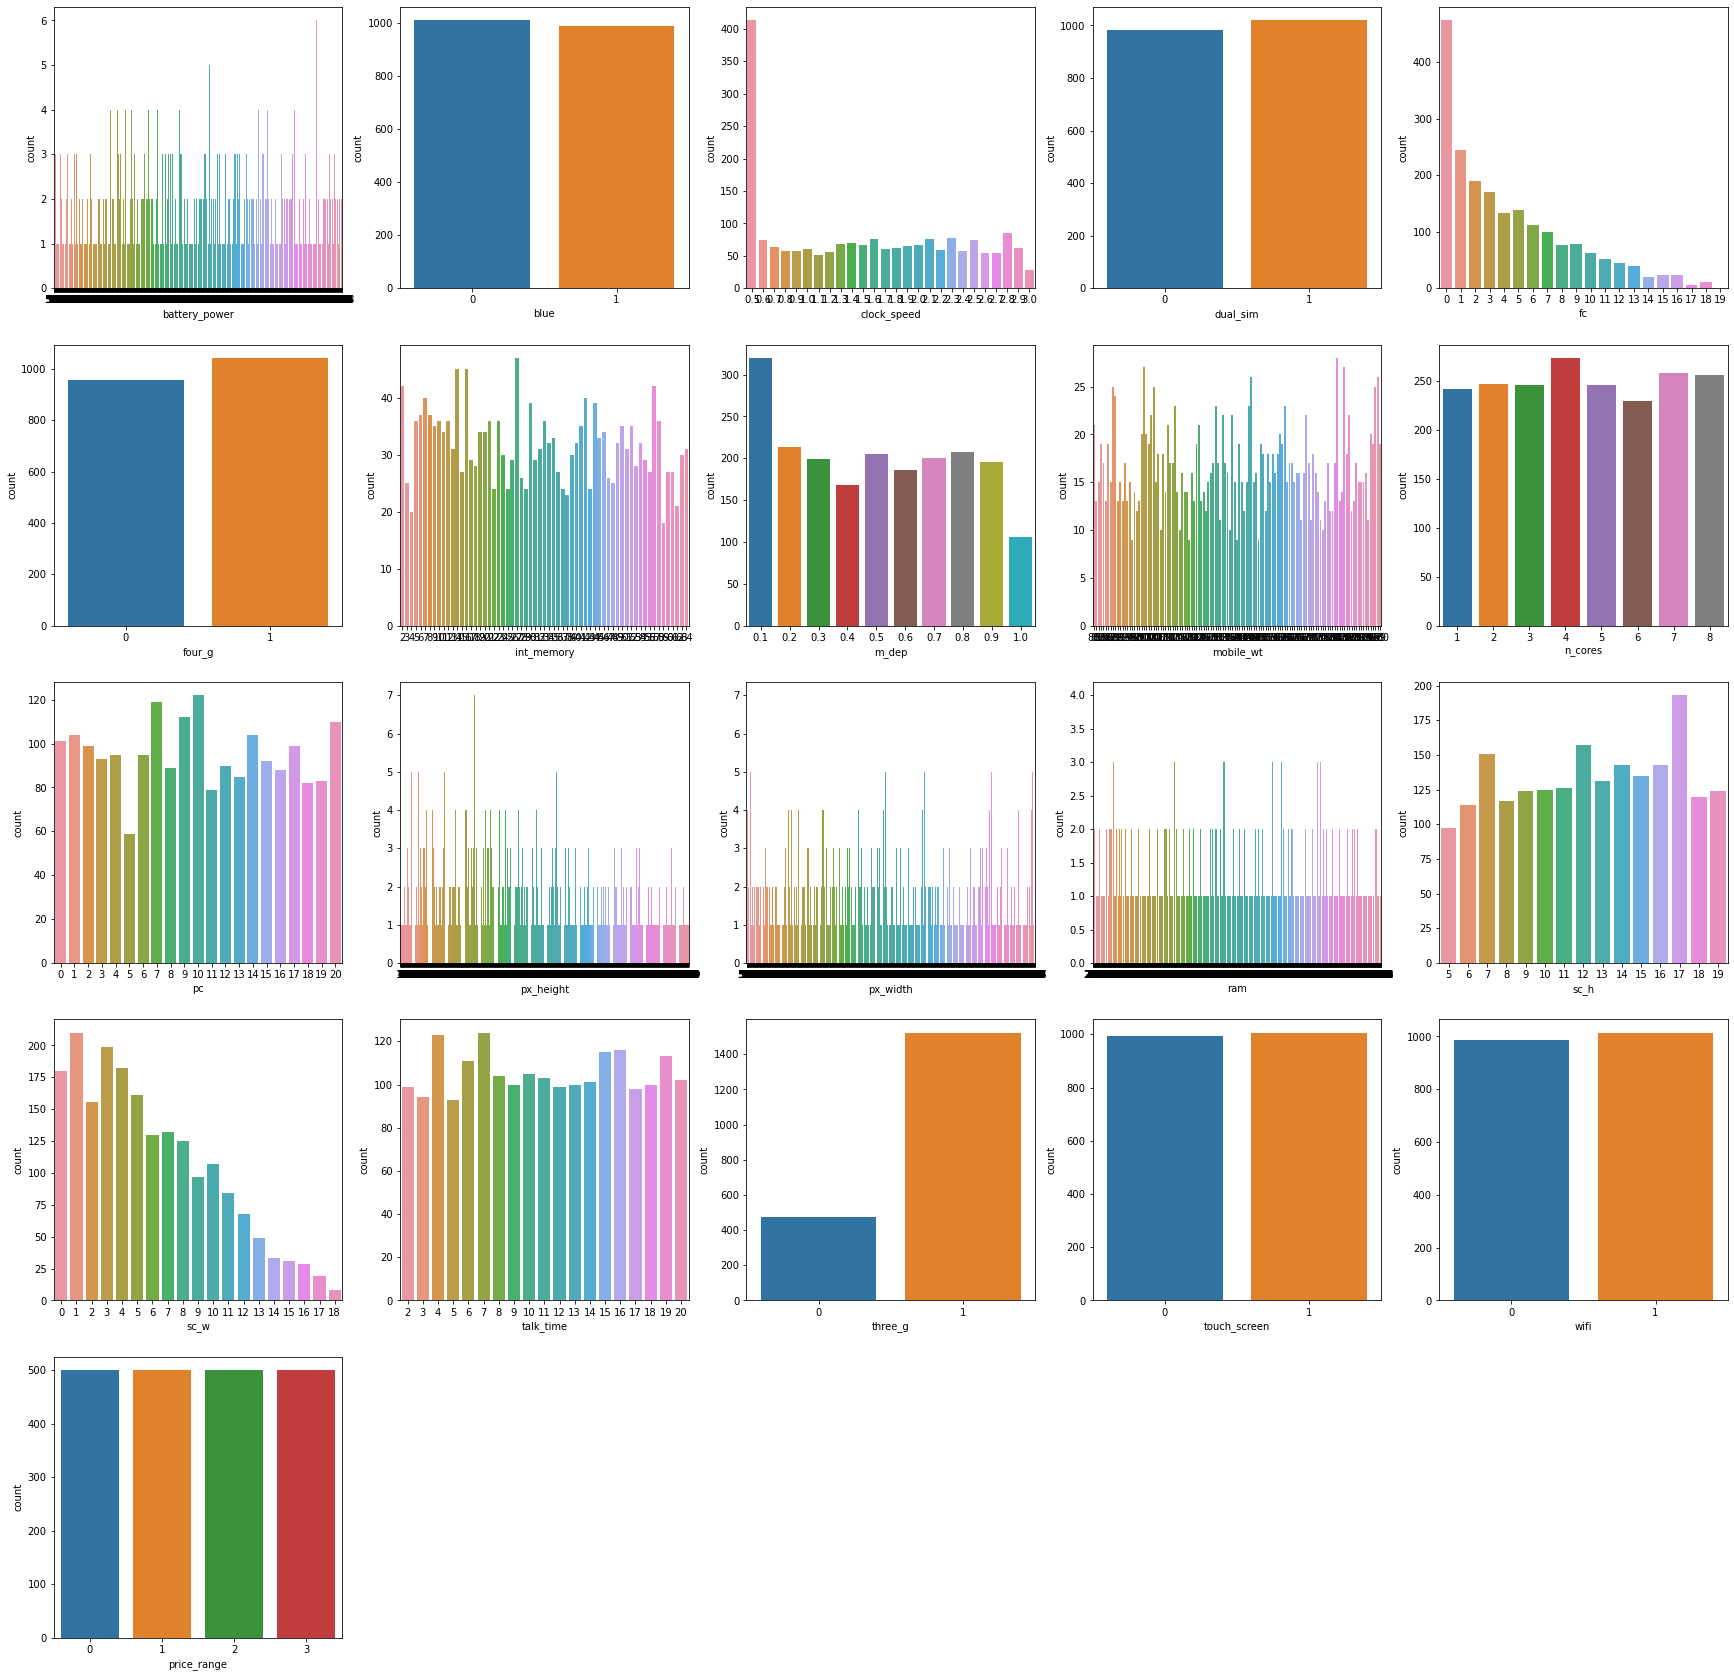

In [14]:
#countplot
column_name=train_df.columns
len_c=len(column_name)
j=1
plt.figure(figsize=(30,30))
for i in range(0,len_c):
  plt.subplot(5,5,j)
  sns.countplot(x=train_df[column_name[i]])
  j=j+1
plt.show()


Its a bit difficult to interpret data from the above graph so for meaningful visualization can take columns with less unique values.

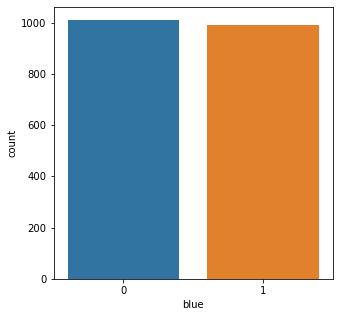

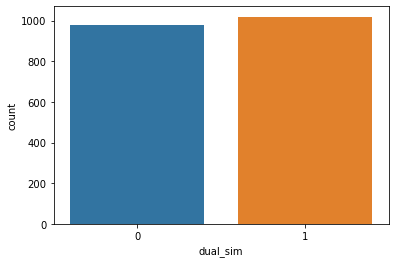

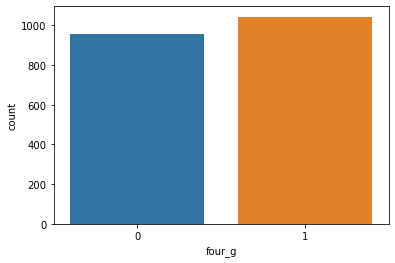

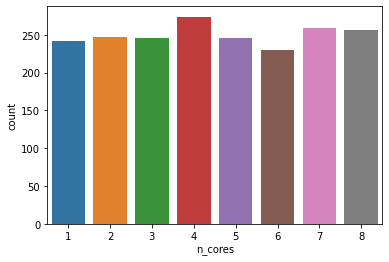

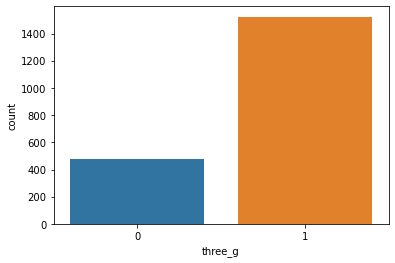

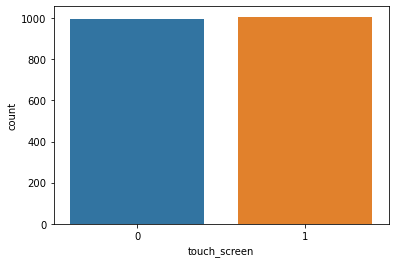

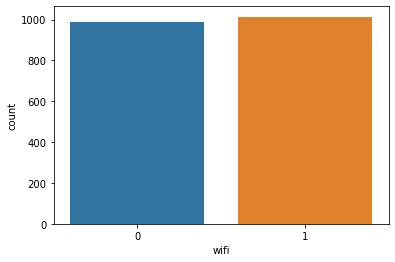

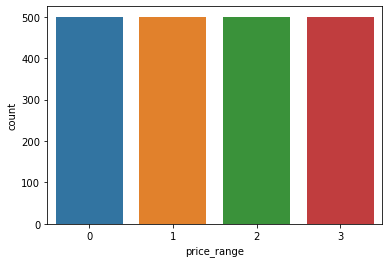

In [15]:
#count plot for less than 10 unique values

plt.figure(figsize=(5,5))

for i in train_df:
    if (train_df[i].nunique())<10:
        sns.countplot(x=train_df[i])
        plt.show()

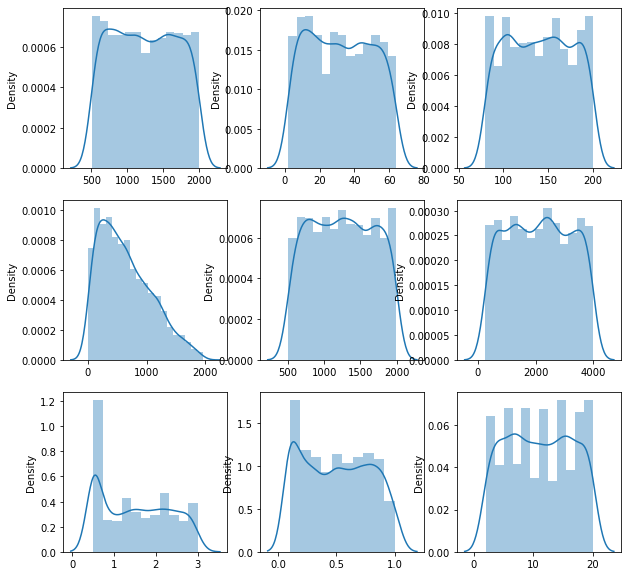

In [16]:
#Distplot for various columns(continous variables in the dataset)

data1= train_df[["battery_power","int_memory","mobile_wt","px_height","px_width","ram","clock_speed","m_dep","talk_time"]]

column_name=data1.columns
col=len(column_name)

j=1
plt.figure(figsize=(10,10))

for i in range(0,col):
  plt.subplot(3,3,j)
  sns.distplot(x=data1[column_name[i]],kde=True)
  j=j+1
  
plt.show()

In [17]:
df = train_df.copy()
#df.head()

In [18]:
#import plotly.offline as pyo
import plotly.express as px

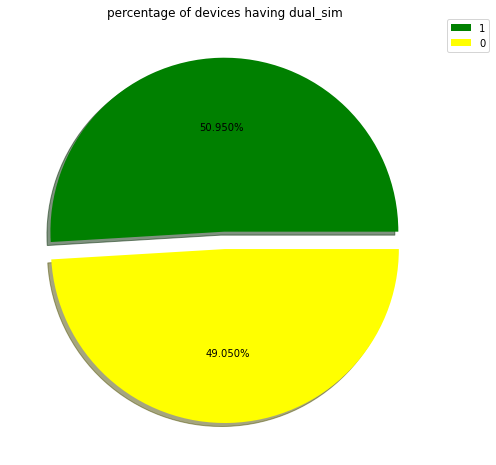

In [20]:
#Pie charts on various columns of the dataset


#pie chart of phones having dual_sim facility

df1 = df["dual_sim"].value_counts()
ax = df1.plot(kind="pie",figsize=(8, 8), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05], colors=['green','yellow'], legend=True, title='percentage of devices having dual_sim', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

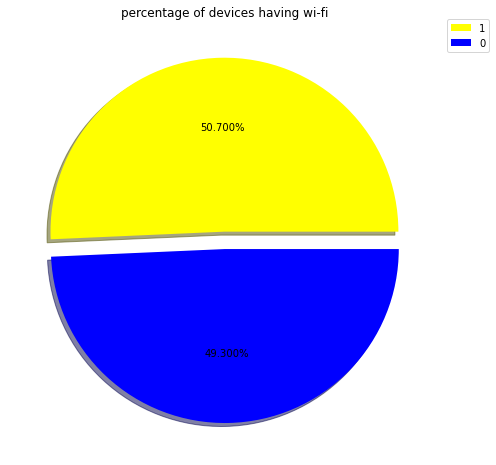

In [21]:
#pie chart of devices having wifi facility
df2 = df["wifi"].value_counts()
ax = df2.plot(kind="pie",figsize=(8, 8), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05], colors= ['yellow', 'blue'], legend=True, title='percentage of devices having wi-fi', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [22]:
#pie chart of devices having bluetooth facility
df["isBluetooth"]=''
for i in range(len(df)):
    if df["blue"][i]==0:
        df["isBluetooth"][i]="No"
    else:
        df["isBluetooth"][i]="Yes"
px.pie(data_frame=df, names="isBluetooth", 
       title="Percentage of devices having bluetooth")

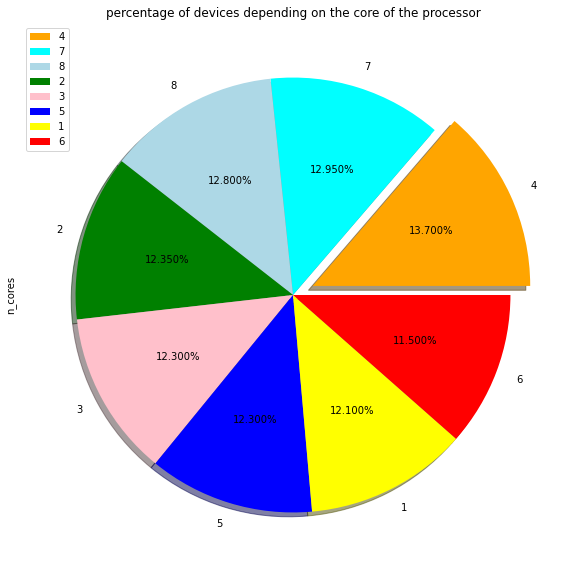

In [23]:
#pie chart of devices depending on the cores
colors = ( "orange", "cyan", "lightblue", "green","pink","blue","yellow","red")
explode = (0.1, 0, 0,0,0,0,0,0)
df['n_cores'].value_counts().plot(kind='pie',y='n_cores',figsize=(10, 10), shadow=True,autopct='%1.3f%%',legend=True,explode=explode,title="percentage of devices depending on the core of the processor", colors = colors)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper right')
plt.show()

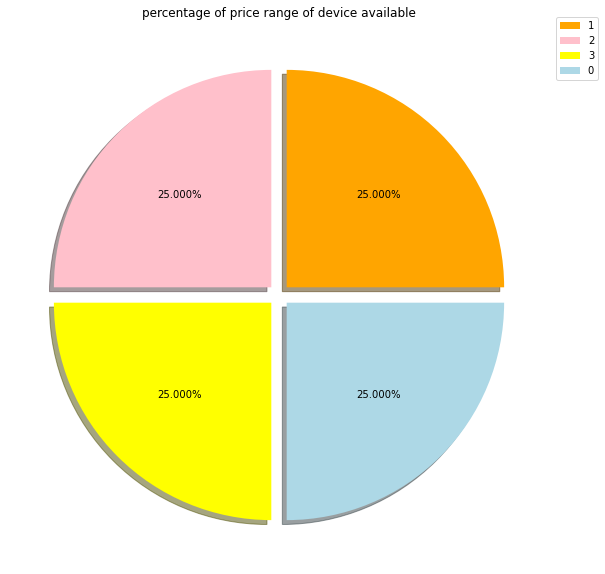

In [24]:
#pie chart of devices depending on the price range

df3 = df["price_range"].value_counts()
ax = df3.plot(kind="pie",figsize=(10, 10), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05,.05,.05], colors= ['orange', 'pink','yellow','lightblue'], legend=True, title='percentage of price range of device available', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [25]:
#pie chart of devices having three g facility
df["is_3G"]=''
for i in range(len(df)):
    if df["three_g"][i]==0:
        df["is_3G"][i]="No"
    else:
        df["is_3G"][i]="Yes"
px.pie(data_frame=df, names="is_3G", title="Percentage of devices having 3G",color_discrete_sequence=px.colors.sequential.RdBu, hole=0.2)

In [26]:
#pie chart of devices having touch screen facility

df["touch_screen"]=''
for i in range(len(df)):
    if df["touch_screen"][i]==0:
        df["touch_screen"][i]="No"
    else:
        df["touch_screen"][i]="Yes"
px.pie(data_frame=df, names="touch_screen", 
       title="Percentage of devices having touch_screen",hole=.3)

2.Bivariant analysis

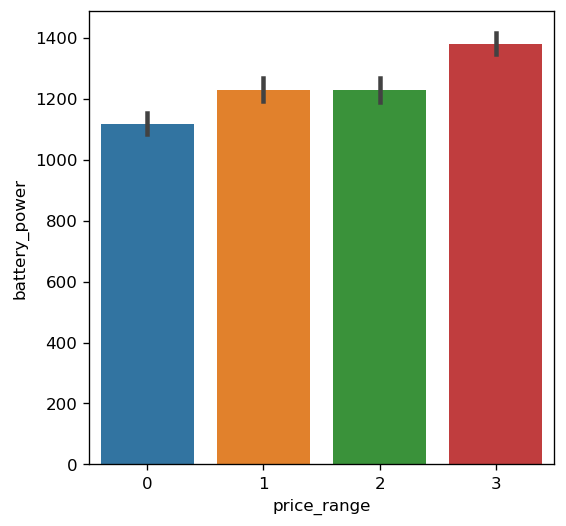

In [27]:
plt.figure(figsize=(5,5),dpi=120)
sns.barplot(y="battery_power", x="price_range", data=train_df)
plt.show()

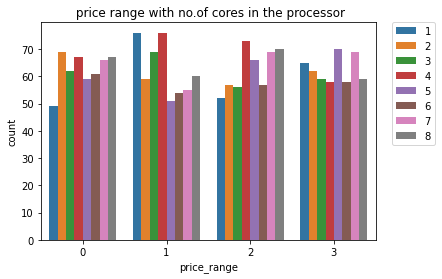

In [28]:
#price dependence on no.of cores

sns.countplot(data=train_df,x="price_range",hue="n_cores")
plt.title(" price range with no.of cores in the processor")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

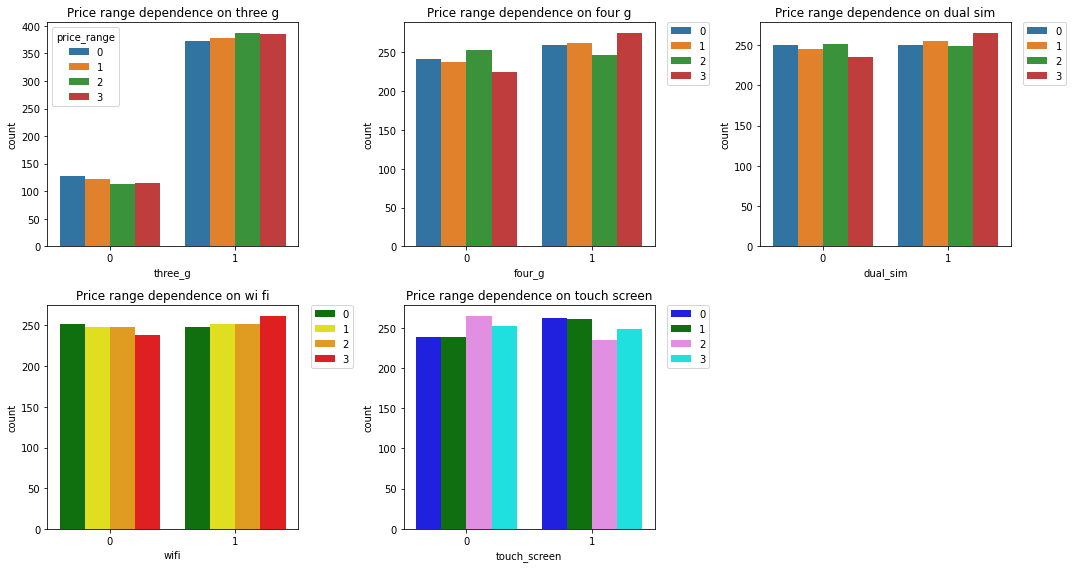

In [29]:
# price range dependence on different features using count plot
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data=train_df,x="three_g",hue="price_range")
plt.title("Price range dependence on three g")


plt.subplot(2,3,2)
sns.countplot(data=train_df,x="four_g",hue="price_range")
plt.title("Price range dependence on four g")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,3)
sns.countplot(data=train_df,x="dual_sim",hue="price_range")
plt.title("Price range dependence on dual sim")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,4)
sns.countplot(data=train_df,x="wifi",hue="price_range",palette=["green","yellow","orange","red"])
plt.title("Price range dependence on wi fi")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,5)
sns.countplot(data=train_df,x="touch_screen",hue="price_range",palette=["blue","green","violet","cyan"])
plt.title("Price range dependence on touch screen")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

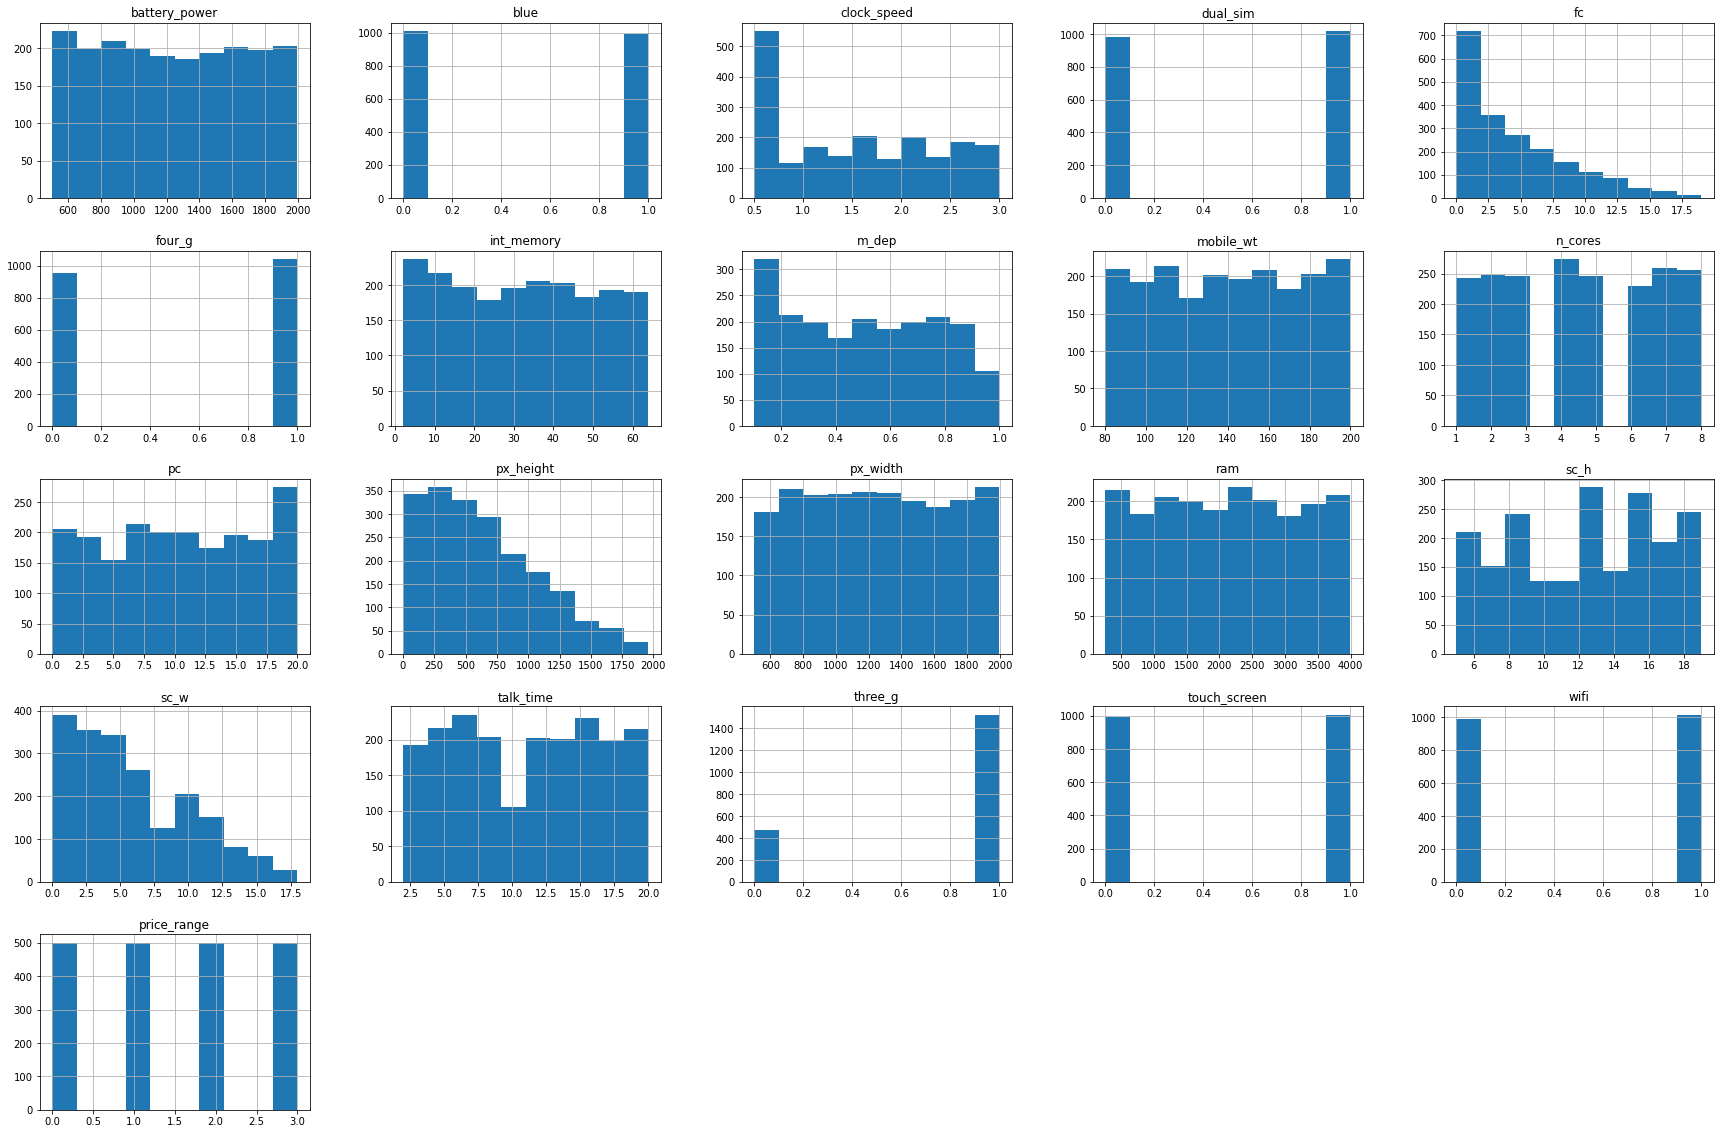

In [31]:
#histogram of the train dataset
train_df.hist(figsize=(30,20))
plt.title("Histogram of all features in the dataset")
plt.show()

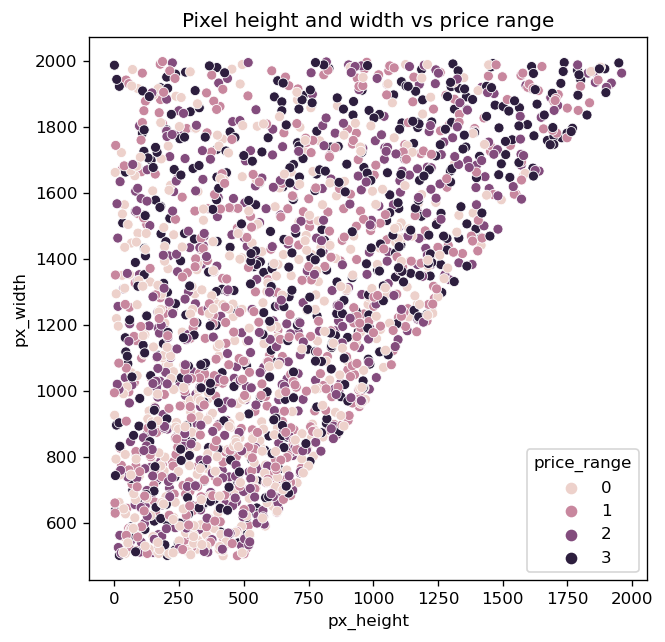

In [32]:
plt.figure(figsize=(6,6),dpi=120)
sns.scatterplot(train_df['px_height'],train_df['px_width'],hue=train_df['price_range'])
plt.title('Pixel height and width vs price range')
plt.show()

It can be seen from the graph that price range is not effected by pixel size.

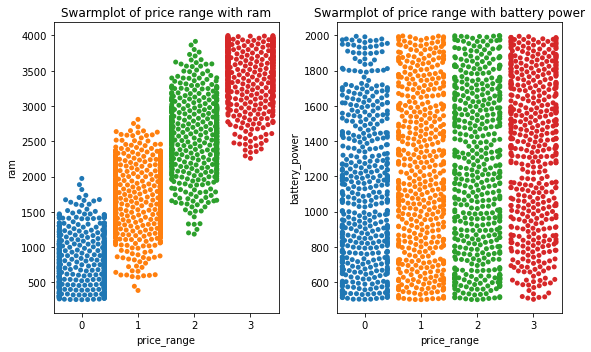

In [33]:
#swarmplot of price range with ram and battery power

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.swarmplot(x = "price_range",y = "ram",data =train_df)
plt.title("Swarmplot of price range with ram")
plt.subplot(1,2,2)
sns.swarmplot(x = "price_range",y = "battery_power",data =train_df)
plt.title("Swarmplot of price range with battery power")
plt.tight_layout()
plt.show()

As price range increases,ram feature is also increasing. Battery power and price range have not much dependence

In [35]:
#Splitting into hardware and software components

In [37]:
#hardware requests data

data2 = train_df.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt',
                    'pc','px_height','px_width','ram','talk_time','three_g','sc_h','sc_w','price_range','wifi','touch_screen']]
print("The shape of the dataset is  ",data2.shape)
data2.head()

The shape of the dataset is   (2000, 19)


battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   
3            615     1         0   0       0          10    0.8        131   
4           1821     1         0  13       1          44    0.6        141   

   pc  px_height  px_width   ram  talk_time  three_g  sc_h  sc_w  price_range  \
0   2         20       756  2549         19        0     9     7            1   
1   6        905      1988  2631          7        1    17     3            2   
2   6       1263      1716  2603          9        1    11     2            2   
3   9       1216      1786  2769         11        1    16     8            2   
4  14       1208      1212  1411         15        1     8     2            1   

   wifi  touch_screen  
0     1             0  
1     0             1  
2     0             1  
3     0             0  
4     0             1

In [38]:
#software requests data

data3 = train_df.loc[:,['n_cores','clock_speed']]
print("The shape of the dataset is  ",data3.shape)
data3.head()

The shape of the dataset is   (2000, 2)


n_cores  clock_speed
0        2          2.2
1        3          0.5
2        5          0.5
3        6          2.5
4        2          1.2

In [39]:
#Merging Datasets

In [40]:
data4 = pd.concat([data2, data3], axis=1)
data4.head(5)

battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   
3            615     1         0   0       0          10    0.8        131   
4           1821     1         0  13       1          44    0.6        141   

   pc  px_height  ...   ram  talk_time  three_g  sc_h  sc_w  price_range  \
0   2         20  ...  2549         19        0     9     7            1   
1   6        905  ...  2631          7        1    17     3            2   
2   6       1263  ...  2603          9        1    11     2            2   
3   9       1216  ...  2769         11        1    16     8            2   
4  14       1208  ...  1411         15        1     8     2            1   

   wifi  touch_screen  n_cores  clock_speed  
0     1             0        2          2.2  
1     0             1        3          0.5  
2     0             1        5          0.5  
3     0             0        6          2.5  
4     0             1        2          1.2  

[5 rows x 21 columns]

### Feature Reduction

In [41]:
#correlation

Correlation heat map on train data


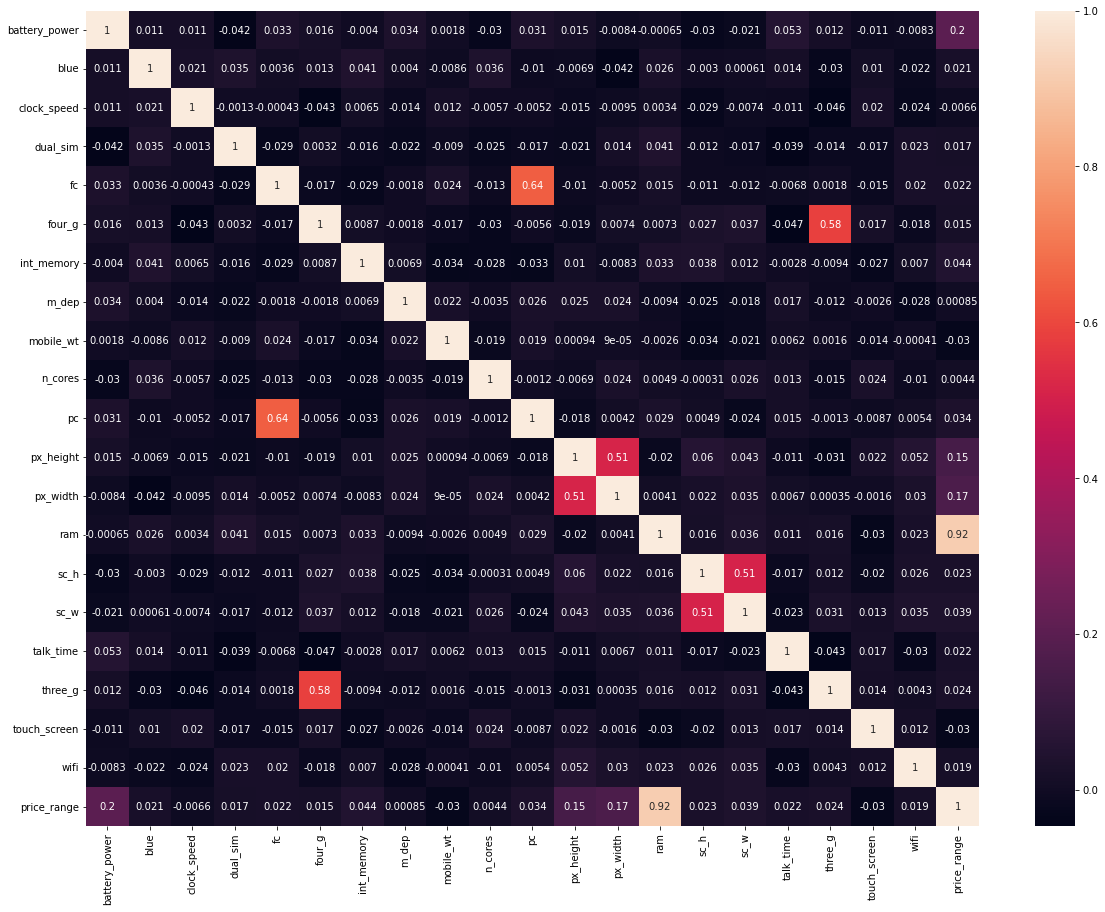

Correlation heat map on test data


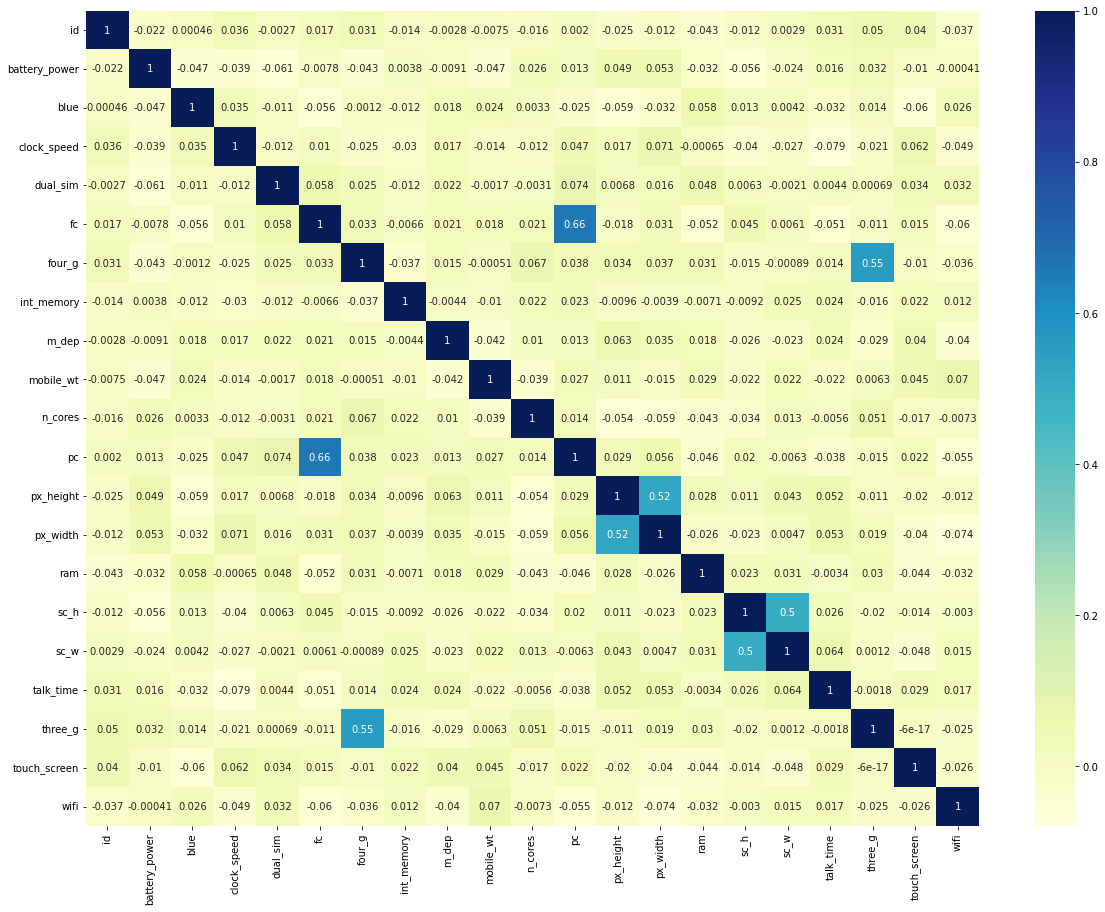

In [42]:
print("Correlation heat map on train data")
train_df_corr=train_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(train_df_corr,annot=True)
plt.show()

print("Correlation heat map on test data")
test_df_corr_test=test_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(test_df_corr_test,annot=True,cmap="YlGnBu")
plt.show()

From the heat map of train dataset it can be seen that 'price range' and 'ram' have high correlation,which is 0.92.'Price range' is our target variable and it has high dependence on RAM so we cannot delete any of those columns.

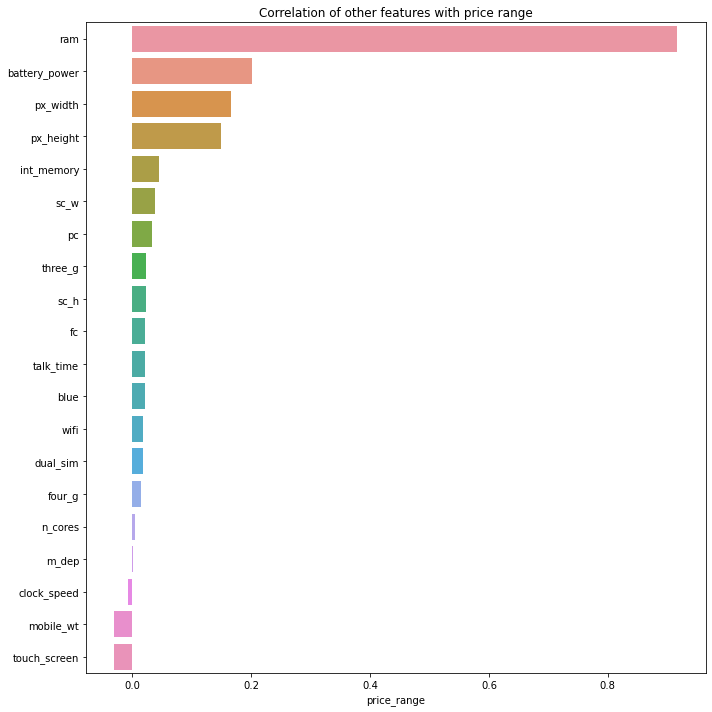

In [43]:
correlation = train_df_corr['price_range'].sort_values(ascending = False)
corr = correlation[1:]
plt.figure(figsize=(10,10))
sns.barplot(corr,corr.index)
plt.title("Correlation of other features with price range")
plt.tight_layout()
plt.show()

In [44]:
# Handling Outlier

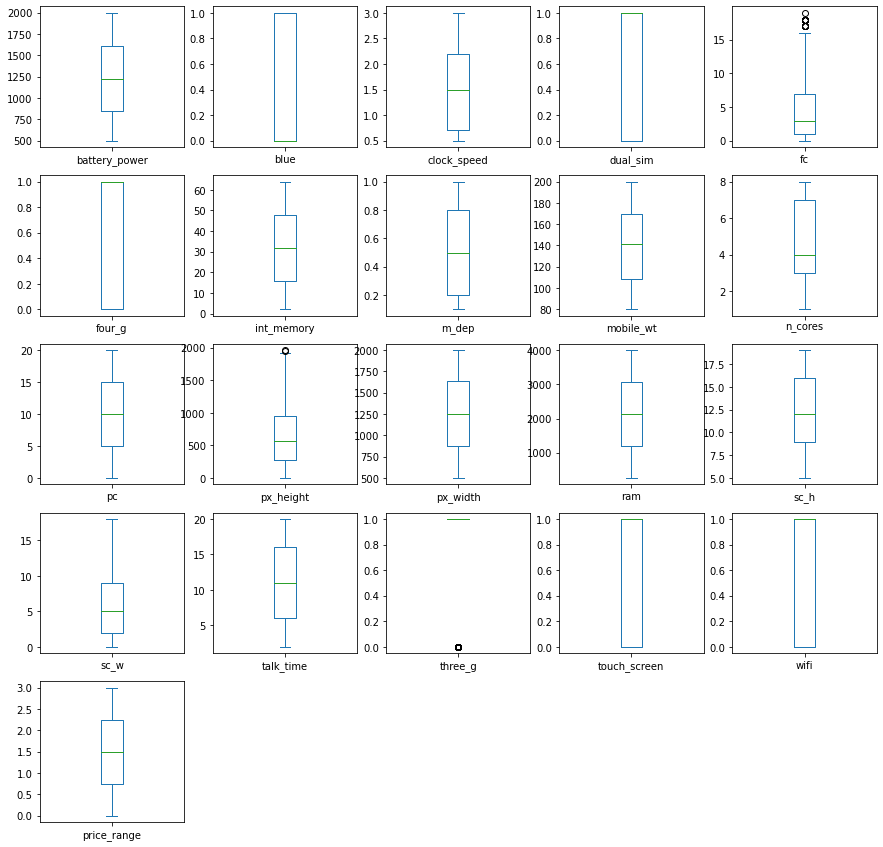

In [45]:
# on train data
train_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15))
plt.show()

outlier is present only for the column 'fc' so capping those values.

In [47]:
train_df['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

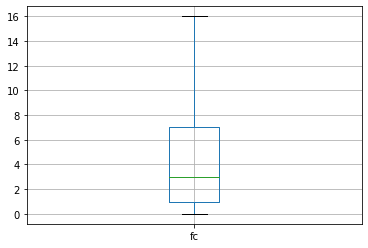

In [48]:
#handling outliers for 'fc'
iqr=train_df['fc'].quantile(.75)-train_df['fc'].quantile(.25)
up=train_df['fc'].quantile(.75) + 1.5*iqr
low=train_df['fc'].quantile(.25) - 1.5*iqr
outliers=train_df[(train_df['fc']<low)|(train_df['fc']>up)]

#using statistics will cap fc > up to upper limit and fc < low to lower limit
train_df.loc[train_df['fc']<low,'fc']=low
train_df.loc[train_df['fc']>up,'fc']=up
train_df[['fc']].boxplot()
plt.show()

### Ranking

In [49]:
new_data=train_df.copy()

In [50]:
new_data["rank_by_price"] = new_data["price_range"].rank()
new_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  rank_by_price  
0             0     1            1          750.5  
1             1     0            2         1250.5  
2             1     0            2         1250.5  
3             0     0            2         1250.5  
4             1     0            1          750.5  

[5 rows x 22 columns]

In [51]:
new_data.sort_values(by=["rank_by_price"]).head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1838            720     1          0.9         1  12       1          14   
1762            808     1          0.5         1   3       0          46   
419             914     1          0.9         0   2       0           4   
846            1489     0          2.4         1   8       0          32   
845            1907     0          2.0         0  13       0          55   

      m_dep  mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  \
1838    0.8        165        4  ...      1234  1086    14     7          3   
1762    0.5        105        8  ...       529  1082    15     5         10   
419     0.8        100        2  ...      1495   808    11     7          5   
846     0.6        200        1  ...       812   776     7     6          8   
845     0.9        105        7  ...      1513   286    14     4         17   

      three_g  touch_screen  wifi  price_range  rank_by_price  
1838        1             1     0            0          250.5  
1762        1             0     1            0          250.5  
419         1             1     0            0          250.5  
846         0             0     0            0          250.5  
845         1             0     1            0          250.5  

[5 rows x 22 columns]

In [53]:
#Ranking on all the features using rank()
 #Ranking of each feature based on the column value and method dense is performed.

new_data1=train_df.rank(ascending=False,axis=0,method="dense")    
new_data1.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          839.0   2.0          9.0       2.0  16.0     2.0        58.0   
1          712.0   1.0         26.0       1.0  17.0     1.0        12.0   
2         1046.0   1.0         26.0       1.0  15.0     1.0        24.0   
3         1006.0   1.0          6.0       2.0  17.0     2.0        55.0   
4          140.0   1.0         19.0       2.0   4.0     1.0        21.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    5.0       13.0      7.0  ...     1119.0     923.0   599.0  11.0  12.0   
1    4.0       65.0      6.0  ...      399.0      10.0   564.0   3.0  16.0   
2    2.0       56.0      4.0  ...      175.0     208.0   578.0   9.0  17.0   
3    3.0       70.0      3.0  ...      202.0     155.0   507.0   4.0  11.0   
4    5.0       60.0      7.0  ...      209.0     592.0  1063.0  12.0  17.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0        2.0      2.0           2.0   1.0          3.0  
1       14.0      1.0           1.0   2.0          2.0  
2       12.0      1.0           1.0   2.0          2.0  
3       10.0      1.0           2.0   2.0          2.0  
4        6.0      1.0           1.0   2.0          3.0  

[5 rows x 21 columns]

In [54]:
new_data1.sort_values(by="price_range")

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
999           172.0   1.0          1.0       2.0  14.0     2.0        45.0   
842           749.0   2.0         11.0       2.0   9.0     1.0        31.0   
844            12.0   2.0         26.0       2.0  10.0     2.0        14.0   
847           120.0   1.0         13.0       1.0   4.0     1.0        49.0   
850           841.0   2.0         25.0       2.0  17.0     1.0         2.0   
...             ...   ...          ...       ...   ...     ...         ...   
811           868.0   2.0         26.0       2.0   8.0     2.0        57.0   
812           648.0   2.0         25.0       1.0  17.0     2.0        40.0   
1373          285.0   1.0          8.0       1.0  14.0     2.0        13.0   
797           496.0   2.0         10.0       1.0  17.0     1.0        24.0   
278          1065.0   2.0         23.0       2.0   5.0     1.0        63.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
999     5.0       13.0      3.0  ...      701.0    1029.0    62.0  15.0  18.0   
842     6.0       83.0      7.0  ...      959.0     351.0   208.0   2.0   2.0   
844     7.0      106.0      6.0  ...      848.0     907.0   360.0  15.0  19.0   
847     4.0       67.0      3.0  ...     1041.0    1052.0   341.0   5.0   5.0   
850     3.0       64.0      2.0  ...      339.0     686.0   226.0   8.0  11.0   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
811     8.0       43.0      4.0  ...      570.0     968.0  1124.0   3.0   6.0   
812     8.0       56.0      8.0  ...      304.0     516.0  1554.0   9.0  17.0   
1373   10.0      101.0      4.0  ...     1018.0     651.0  1388.0  13.0  16.0   
797     5.0       57.0      2.0  ...     1037.0     580.0  1436.0   9.0  18.0   
278     3.0       24.0      2.0  ...      942.0     993.0  1498.0  12.0  15.0   

      talk_time  three_g  touch_screen  wifi  price_range  
999        14.0      2.0           1.0   1.0          1.0  
842        10.0      1.0           1.0   1.0          1.0  
844         8.0      1.0           2.0   2.0          1.0  
847         6.0      1.0           1.0   2.0          1.0  
850         3.0      1.0           1.0   2.0          1.0  
...         ...      ...           ...   ...          ...  
811        19.0      2.0           1.0   1.0          4.0  
812         9.0      1.0           2.0   1.0          4.0  
1373       19.0      1.0           1.0   2.0          4.0  
797         7.0      1.0           1.0   2.0          4.0  
278        12.0      1.0           2.0   1.0          4.0  

[2000 rows x 21 columns]

In [55]:
#Ranking all the features separately to correct output

nd = train_df.copy()
nd["rank_by_price"] = nd["price_range"].rank()
nd["rank_by_battery"] = nd["battery_power"].rank(ascending=False)
nd["rank_by_blueooth"] = nd["blue"].rank(ascending=False)
nd["rank_by_clockspeed"] = nd["clock_speed"].rank(ascending=False)
nd["rank_by_DualSIM"] = nd["dual_sim"].rank(ascending=False)
nd["rank_by_fc"] = nd["fc"].rank(ascending=False)
nd["rank_by_4G"] = nd["four_g"].rank(ascending=False)
nd["rank_by_InternalMemory"] = nd["int_memory"].rank(ascending=False)
nd["rank_by_mdep"] = nd["m_dep"].rank(ascending=False)
nd["rank_by_weight"] = nd["mobile_wt"].rank(ascending=True)
nd["rank_by_ncores"] = nd["n_cores"].rank(ascending=False)
nd["rank_by_pc"] = nd["pc"].rank(ascending=False)
nd["rank_by_height"] =nd["px_height"].rank(ascending=False)
nd["rank_by_width"] = nd["px_width"].rank(ascending=False)
nd["rank_by_ram"] = nd["ram"].rank(ascending=False)
nd["rank_by_sch"] = nd["sc_h"].rank(ascending=False)
nd["rank_by_scw"] = nd["sc_w"].rank(ascending=False)
nd["rank_by_talktime"] = nd["talk_time"].rank(ascending=False)
nd["rank_by_3G"] = nd["three_g"].rank(ascending=False)
nd["rank_by_touchscreen"] = nd["touch_screen"].rank(ascending=False)
nd["rank_by_wifi"] = nd["wifi"].rank(ascending=False)
nd.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  rank_by_pc  rank_by_height  rank_by_width  \
0        188        2  ...      1746.0          1972.5         1664.5   
1        136        3  ...      1402.0           545.5           17.0   
2        145        5  ...      1402.0           212.0          386.5   
3        131        6  ...      1090.5           250.0          287.0   
4        141        2  ...       606.5           261.5         1054.0   

   rank_by_ram  rank_by_sch  rank_by_scw  rank_by_talktime  rank_by_3G  \
0        762.5       1459.5        716.5             159.0      1762.0   
1        714.0        341.0       1355.0            1418.5       762.0   
2        732.0       1209.5       1532.5            1202.5       762.0   
3        639.0        509.0        588.0             996.0       762.0   
4       1375.0       1580.0       1532.5             587.0       762.0   

   rank_by_touchscreen  rank_by_wifi  
0               1503.5         507.5  
1                503.5        1507.5  
2                503.5        1507.5  
3               1503.5        1507.5  
4                503.5        1507.5  

[5 rows x 42 columns]

In [57]:
#Splitting the dataset into independent and dependent variables

#independent variable "X"
X=train_df.drop(["price_range"],axis=1)
x1=X.copy()
#dependent variable "y"
y=train_df["price_range"]

print(X.shape)
print(y.shape)

(2000, 20)
(2000,)


In [58]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Applying SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.454588
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


[0.06102279 0.02000301 0.03281823 0.01982319 0.03131965 0.01786296
 0.03462623 0.03422741 0.03683654 0.03268081 0.03349434 0.04646401
 0.04834888 0.39606397 0.03373223 0.03409764 0.03417503 0.01444559
 0.01805452 0.01990298]


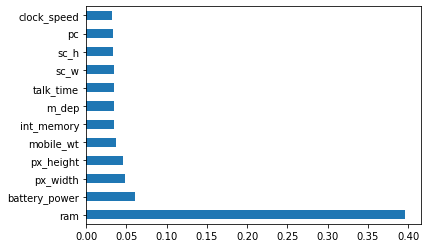

In [59]:
#Feature importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

### Scaling

In [60]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)
X=pd.DataFrame(X,columns=x1.columns)
X.describe()

battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.128298e-16 -1.927347e-16 -2.172151e-16  3.990142e-16  7.269185e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.678817e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.997797e-01   
25%    -8.804033e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.669479e-01   
50%    -2.849593e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.012843e-01   
75%     8.575560e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.300428e-01   
max     1.728812e+00  1.010051e+00  1.811412e+00  9.811771e-01  2.725529e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean  -2.048361e-16 -8.754109e-17 -1.045830e-16  1.804112e-16 -4.690692e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.043966e+00 -1.656260e+00 -1.393304e+00 -1.702391e+00 -1.539175e+00   
25%   -1.043966e+00 -8.845346e-01 -1.046495e+00 -8.829695e-01 -6.647678e-01   
50%    9.578860e-01 -2.563229e-03 -6.069151e-03  2.122020e-02 -2.275644e-01   
75%    9.578860e-01  8.794082e-01  1.034357e+00  8.406421e-01  1.084046e+00   
max    9.578860e-01  1.761380e+00  1.727974e+00  1.688320e+00  1.521249e+00   

                 pc     px_height      px_width           ram          sc_h  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.669775e-16  1.287304e-16  5.595524e-17 -1.582068e-16  3.719247e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.635631e+00 -1.454027e+00 -1.739251e+00 -1.722711e+00 -1.734608e+00   
25%   -8.109291e-01 -8.167289e-01 -8.719579e-01 -8.453168e-01 -7.849833e-01   
50%    1.377252e-02 -1.828116e-01 -1.045034e-02  2.055123e-02 -7.276497e-02   
75%    8.384742e-01  6.810064e-01  8.828792e-01  8.670548e-01  8.768595e-01   
max    1.663176e+00  2.963672e+00  1.727608e+00  1.727851e+00  1.589078e+00   

               sc_w     talk_time       three_g  touch_screen          wifi  
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  
mean  -4.085621e-17  1.052491e-16  2.184919e-16  3.065326e-16  4.278800e-16  
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.324131e+00 -1.649584e+00 -1.786861e+00 -1.006018e+00 -1.014099e+00  
25%   -8.649215e-01 -9.173306e-01  5.596406e-01 -1.006018e+00 -1.014099e+00  
50%   -1.761069e-01 -2.013697e-03  5.596406e-01  9.940179e-01  9.860966e-01  
75%    7.423125e-01  9.133032e-01  5.596406e-01  9.940179e-01  9.860966e-01  
max    2.808756e+00  1.645557e+00  5.596406e-01  9.940179e-01  9.860966e-01

## Model Building

In [61]:
#Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1600, 20) (400, 20)
(1600,) (400,)


In [62]:
#Since it is a classification problem we are going to use different classification algorithms for our dataset.
#Logistic Regression, k-Nearest Neighbors,Decision Tree,Random Forest,SVM,Xg booster, Naive Bayes are used.

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

In [64]:
#Logistic Regression

Training score of logistic regression is :  0.976
Accuracy score of logistic regression is 97.5 %

 The classification report of logistic regression is : 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400


 The confusion matrix of logistic regression is 

 [[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


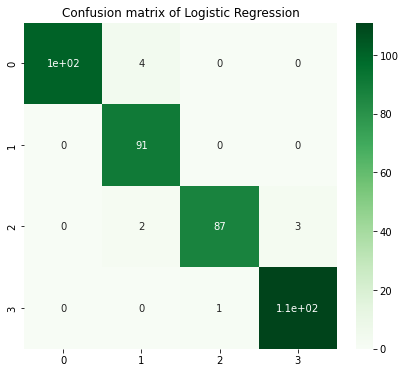

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)

#training score
lr_train_acc=round(lr.score(x_train,y_train),3)
print("Training score of logistic regression is : ",lr_train_acc)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy score of logistic regression is", round(acc_lr*100,2),"%")

#classification report
print("\n The classification report of logistic regression is : \n")
print(classification_report(y_test, y_pred_lr))

#confusion matrix
c=confusion_matrix(y_test,y_pred_lr)
print("\n The confusion matrix of logistic regression is \n\n",c)

plt.figure(figsize=(7,6))
sns.heatmap(c, annot=True,cmap="Greens")
plt.title("Confusion matrix of Logistic Regression")
plt.show()

In [66]:
#kNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    acc_values.append(acc)

In [68]:
acc_values

[0.48,
 0.4925,
 0.53,
 0.5375,
 0.535,
 0.53,
 0.5525,
 0.555,
 0.56,
 0.5525,
 0.555,
 0.5625,
 0.5525,
 0.5475,
 0.585,
 0.57,
 0.58]

Text(0, 0.5, 'accuracy')

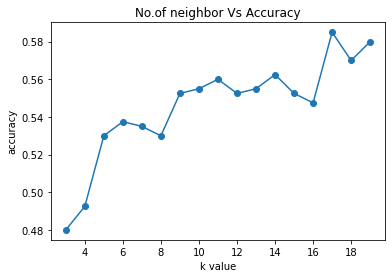

In [69]:
plt.plot(neighbors,acc_values,'o-')
plt.title("No.of neighbor Vs Accuracy")
plt.xlabel('k value')
plt.ylabel('accuracy')

Training score of logistic regression is :  0.691
Accuracy score of logistic regression is 58.5 %
f1 score is:  0.585

 The confusion matrix of logistic regression is 

 [[78 24  3  0]
 [24 44 22  1]
 [ 5 28 43 16]
 [ 1  5 37 69]]

 The classification report of KNN :
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       105
           1       0.44      0.48      0.46        91
           2       0.41      0.47      0.44        92
           3       0.80      0.62      0.70       112

    accuracy                           0.58       400
   macro avg       0.59      0.58      0.58       400
weighted avg       0.61      0.58      0.59       400



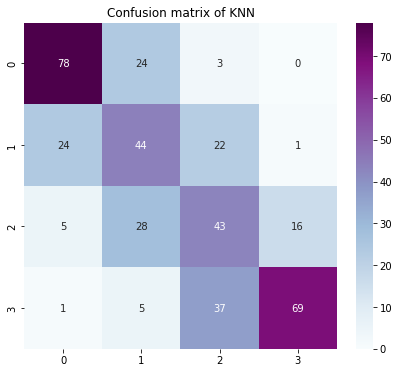

In [70]:
#giving k value as 17
classifier=KNeighborsClassifier(n_neighbors=17,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

#training score
knn_train_acc=round(classifier.score(x_train,y_train),3)
print("Training score of logistic regression is : ",knn_train_acc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score of logistic regression is", round(acc_knn*100,2),"%")

print("f1 score is: ",f1_score(y_test,y_pred_knn,pos_label='positive',average='micro'))

#confusion matrix
c=confusion_matrix(y_test,y_pred_knn)
print("\n The confusion matrix of logistic regression is \n\n",c)

print("\n The classification report of KNN :")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(7,6))
sns.heatmap(c, annot=True,cmap="BuPu")
plt.title("Confusion matrix of KNN")
plt.show()

In [71]:
#Decision tree

Training score of logistic regression is :  1.0
Accuracy score of logistic regression is 83.75 %
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       105
           1       0.75      0.85      0.79        91
           2       0.76      0.75      0.75        92
           3       0.90      0.88      0.89       112

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400

[[91 14  0  0]
 [ 6 77  8  0]
 [ 0 12 69 11]
 [ 0  0 14 98]]


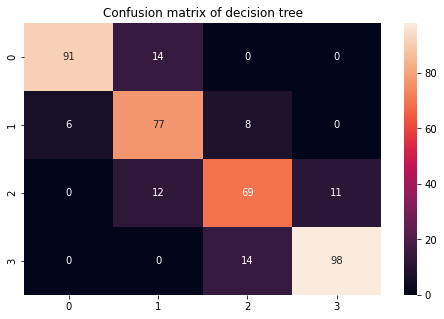

In [72]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

#training score
dt_train_acc=round(clf.score(x_train,y_train),3)
print("Training score of logistic regression is : ",dt_train_acc)
acc_dt = accuracy_score(y_test, y_pred)
print("Accuracy score of logistic regression is", round(acc_dt*100,2),"%")

print(classification_report(y_test,y_pred))

c=confusion_matrix(y_test,y_pred)
print(c)

plt.figure(figsize=(8,5))
sns.heatmap(c, annot=True)
plt.title("Confusion matrix of decision tree")
plt.show()

In [73]:
#Random Forest

Training score of logistic regression is :  1.0
Accuracy score of logistic regression is 88.0 %

 Confusion matrix of Random forest classifier is : 
 [[101   4   0   0]
 [  6  76   9   0]
 [  0   8  77   7]
 [  0   0  14  98]]

The classification report of Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.84      0.85        91
           2       0.77      0.84      0.80        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



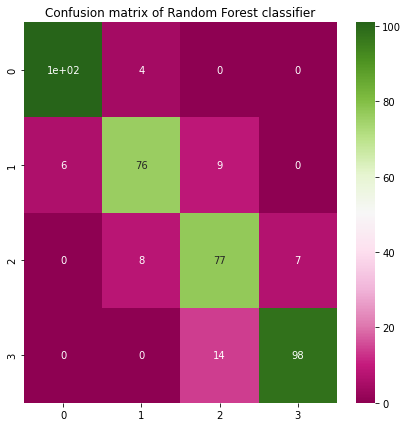

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

#training score
rf_train_acc=round(rf.score(x_train,y_train),3)
print("Training score of logistic regression is : ",rf_train_acc)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score of logistic regression is", round(acc_rf*100,2),"%")

#confusion matrix
c_rf=confusion_matrix(y_test,y_pred_rf)
print("\n Confusion matrix of Random forest classifier is : \n",c_rf)
#classification report
print("\nThe classification report of Random Forest Classifier is:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(7,7))
sns.heatmap(c_rf, annot=True,cmap="PiYG")
plt.title("Confusion matrix of Random Forest classifier")
plt.show()

In [75]:
#svc

Training score of logistic regression is :  0.976
Accuracy score of logistic regression is 89.25 %

 Confusion matrix of Random forest classifier is : 
 [[ 98   7   0   0]
 [  5  81   5   0]
 [  0  13  75   4]
 [  0   0   9 103]]

The classification report of Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



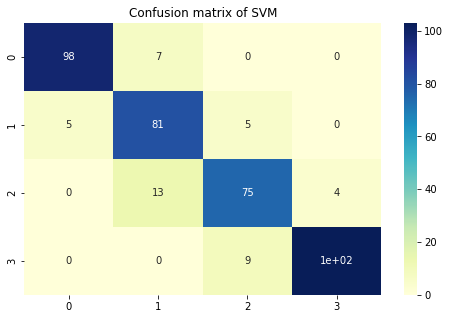

In [76]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)

#training score
svm_train_acc=round(lr.score(x_train,y_train),3)
print("Training score of logistic regression is : ",svm_train_acc)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy score of logistic regression is", round(acc_svm*100,2),"%")

cm_svm=confusion_matrix(y_test,y_pred_svm)
print("\n Confusion matrix of Random forest classifier is : \n",cm_svm)

#classification report
print("\nThe classification report of Random Forest Classifier is:")
print(classification_report(y_test, y_pred_svm))

con_svm=confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,5))
sns.heatmap(cm_svm, annot=True,cmap="YlGnBu")
plt.title("Confusion matrix of SVM")
plt.show()

In [77]:
#Naive bayes classifier
#Gaussian

Training score of logistic regression is :  0.819
Accuracy score of logistic regression is 79.75 %

 Confusion matrix of Random forest classifier is : 
 [[91 14  0  0]
 [ 6 77  8  0]
 [ 0 12 69 11]
 [ 0  0 14 98]]

The classification report of Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



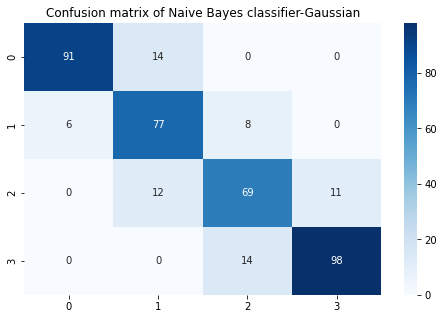

In [78]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train, y_train)
y_pred_g=classifier.predict(x_test)

#training score
g_train_acc=round(classifier.score(x_train,y_train),3)
print("Training score of logistic regression is : ",g_train_acc)
acc_g = accuracy_score(y_test, y_pred_g)
print("Accuracy score of logistic regression is", round(acc_g*100,2),"%")

cm_g= confusion_matrix(y_test,y_pred)
print("\n Confusion matrix of Random forest classifier is : \n",cm_g)

#classification report
print("\nThe classification report of Random Forest Classifier is:")
print(classification_report(y_test, y_pred_g))

con_nb=confusion_matrix(y_test, y_pred_g)
plt.figure(figsize=(8,5))
sns.heatmap(cm_g, annot=True,cmap="Blues")
plt.title("Confusion matrix of Naive Bayes classifier-Gaussian")
plt.show()

In [84]:
Results = pd.DataFrame(columns = ['Model', 'Training Score',"Accuracy Score"])

Results = Results.append({'Model' : 'Logistic Regression', 'Training Score': lr_train_acc,"Accuracy Score":round(acc_lr,2)}, ignore_index = True)
Results = Results.append({'Model' : 'KNN', 'Training Score': knn_train_acc,"Accuracy Score":round(acc_knn,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Decision Treet', 'Training Score': dt_train_acc,"Accuracy Score":round(acc_dt,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Random Forest', 'Training Score': rf_train_acc,"Accuracy Score":round(acc_rf,2)}, ignore_index = True)
Results = Results.append({'Model' : 'SVM', 'Training Score': svm_train_acc,"Accuracy Score":round(acc_svm,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Naive Bayes', 'Training Score': g_train_acc,"Accuracy Score":round(acc_g,2)}, ignore_index = True)

In [86]:
Results.sort_values("Accuracy Score",ascending=False)
Results.reset_index(drop=True, inplace=True)
print("The table that contains the training score and accuracy(test) score for different models")
Results.sort_values("Accuracy Score",ascending=False)

The table that contains the training score and accuracy(test) score for different models


Model  Training Score  Accuracy Score
0  Logistic Regression           0.976            0.98
4                  SVM           0.976            0.89
3        Random Forest           1.000            0.88
2       Decision Treet           1.000            0.84
5          Naive Bayes           0.819            0.80
1                  KNN           0.691            0.58

 Logistic regression have the highest accuracy score.

### Hyperparameter tuning

In [89]:
#Hyper parameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.968333 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [90]:
lr=LogisticRegression(C= 100, penalty = 'l2', solver = 'lbfgs')
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
acc_lr_new=accuracy_score(y_test,y_pred_lr)
print("Accuracy for Logistic Regression on tuned data: ",accuracy_score(y_test,y_pred_lr))
print('Improvement of {:0.2f}% in accuracy after performing hyperparameter tuning. '.format( 100 * (acc_lr_new - acc_lr) / acc_lr))

Accuracy for Logistic Regression on tuned data:  0.975
Improvement of 0.00% in accuracy after performing hyperparameter tuning. 


In [92]:
#Performing K-Fold and Cross Validation on all the algorithms to get better accuracy and result

K_Fold = KFold(n_splits=10)
abc=[]
Acc = []
Classifiers = ["Logistic Regression", "KNN","Decision Tree", "Random Forest", "SVM","Naive Bayes"]
Models = [LogisticRegression(),KNeighborsClassifier(), DecisionTreeClassifier(criterion="entropy"), RandomForestClassifier(n_estimators=300), SVC(kernel="rbf"), GaussianNB()]
for i in Models:
    model = i
    CV_Result = cross_val_score(model, x_train, y_train, cv=K_Fold, scoring="accuracy")
    abc.append(CV_Result.mean())
    Acc.append(CV_Result)

CV_ModelData = pd.DataFrame(abc, index=Classifiers)
CV_ModelData.columns = ["CV Mean"]
CV_ModelData

CV Mean
Logistic Regression  0.953750
KNN                  0.485000
Decision Tree        0.851875
Random Forest        0.876250
SVM                  0.870625
Naive Bayes          0.795000

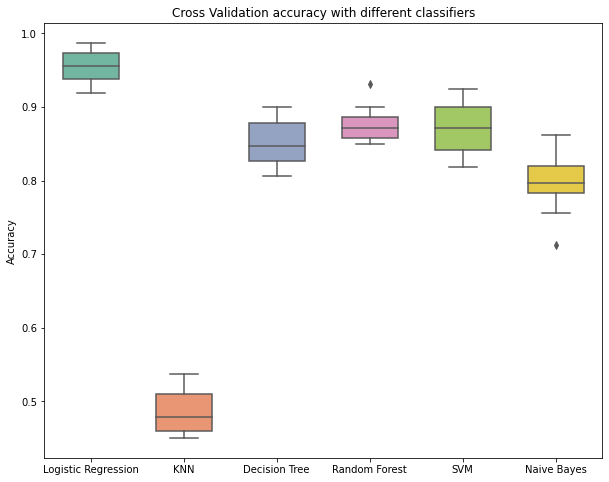

In [94]:
box = pd.DataFrame(Acc, index=[Classifiers])
boxT = box.T
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=boxT, orient="v", palette="Set2", width=.6)
ax.set_title('Cross Validation accuracy with different classifiers')
ax.set_xticklabels(Classifiers)
ax.set_ylabel('Accuracy')
plt.show()

In [95]:
#Test dataset to predict the results

In [96]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [97]:
new_df=test_df.copy()

In [98]:
test=test_df.drop(['id'],axis=1)

In [99]:
test_scaled=scalar.fit_transform(test)
test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [100]:
test_pred=lr.predict(test_scaled)
result=pd.DataFrame(test_pred)
print(result)

     0
0    3
1    3
2    2
3    3
4    1
..  ..
995  2
996  1
997  0
998  2
999  2

[1000 rows x 1 columns]


the price range of test dataset is predicted.

In [101]:
new_df['price_range']=test_pred
new_df.head(2)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  

[2 rows x 22 columns]

In [102]:
new_df.to_csv('finaldata.csv', index = False)